<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_5/pEbNtDxzx0Q.jpg" height="500" width="500"> 

# <center> R для тервера и матстата <br>  <br> Доверительные интервалы: УХ! Порешаем!  </center>

---------------

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2020). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://github.com/FUlyankin/r_probability) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

-----------

In [5]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

In [6]:
library('rio')  # https://www.rdocumentation.org/packages/rio/versions/0.5.16

## Упражнение 1 (разброс и смещение) 

Случайные величины $X_1, X_2, \ldots, X_n$ независимы и одинаково распределены с неизвестными $\mathbb{E}(X_i)=\mu$ и $Var(X_i)=\sigma^2$. Исследовательница Борислава хочет использовать оценку вида $\hat\mu = c (X_1 + X_2 + \ldots + X_n)$ для неизвестного параметра $\mu$.

$$
\hat X_{n+1} = \hat \mu
$$



__[а]__ При каком $c$ оценка Бориславы будет несмещённой? Возможно ли использовать такое $c$ в практической задаче?

$$
\mathbb{E}(\hat \mu) = \mathbb{E}(c (X_1 + X_2 + \ldots + X_n)) = c \cdot (\mathbb{E}(X_1)  + \mathbb{E}(X_2) + \ldots + \mathbb{E}(X_n)) = c \cdot n \cdot \mu 
$$

$$
Var(\hat \mu) = Var(c (X_1 + X_2 + \ldots + X_n)) = c^2 \cdot (Var(X_1)  + Var(X_2) + \ldots + Var(X_n)) = c^2 \cdot n \cdot \sigma^2
$$

$$
c \cdot n \cdot \mu = \mu  \Rightarrow c = \frac{1}{n}
$$

__[б]__ При каком $c$ будет минимальной величина $MSE = \mathbb{E}((\hat \mu -\mu)^2)$? Возможно ли использовать такое $c$ в практической задаче?

$$
MSE(\hat \mu) = Var(\hat \mu) + (\mathbb{E}(\hat \mu) - \mu)^2 = c^2 \cdot n \cdot \sigma^2 + (c \cdot n \cdot \mu - \mu)^2 \to \min_{c}
$$

\begin{equation*}
\begin{aligned}
& 2 \cdot c \cdot n \cdot \sigma^2 + 2 \cdot (c \cdot n \cdot \mu - \mu) \cdot n \cdot \mu = 0 \\
& c \cdot (\sigma^2 + n \mu^2) - \mu^2 = 0\\ 
& c = \frac{\mu^2}{\sigma^2 + n \mu^2} = \frac{1}{n + \frac{\sigma^2}{\mu^2}}
\end{aligned} 
\end{equation*}

__[в]__ Святозар минимизирует по $\mu$ штрафную функцию
  
  $$
  Q(\hat\mu) = \sum (X_i - \mu)^2 + \lambda \mu^2.
  $$
  
При каком $\lambda$ оценка Святозара совпадёт с несмещённой оценкой Бориславы? С оценкой минимизирующей MSE?

\begin{equation*}
\begin{aligned}
& \sum (X_i - \mu)^2 + \lambda \mu^2 \to \min_{\mu} \\
& -2 \cdot \sum (X_i - \hat \mu) + 2 \cdot \lambda \cdot \hat \mu = 0 \\
& \sum X_i  = (\lambda + n) \cdot \hat \mu \\
& \hat \mu = \frac{1}{n + \lambda} \cdot \sum X_i
\end{aligned} 
\end{equation*}

## Упражнение 2 (аварии на шахтах) 

На угольных шахтах ежегодно происходят аварии. Англия довольно давно [собирает информацию](https://github.com/FUlyankin/matstat_online/blob/master/data/coals.csv)) о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [6]:
df = import('coals.txt')
head(df)

V1,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0
6,1856,4


Посмотрим на распределение числа аварий. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


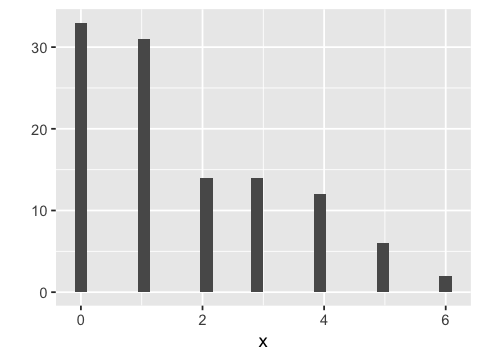

In [8]:
x = df$count
qplot(x)

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

$$
\mathbb{P}(X = k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
$$


$$
\mathbb{E}(X) = \lambda \quad Var(X) = \lambda 
$$


__Задание 1:__ найдите оценку параметра $\lambda$ с помощью метода моментов.

$$
\mathbb{E}(X) \approx \bar x_n \quad \hat{\lambda}^{MM} = \bar x
$$

In [18]:
n = length(x)
lam_hat = mean(x)
lam_hat

[1] 1.705357

__Задание 2:__ постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В качестве ответа вбейте ширину доверительного интервала. 

\begin{equation*}
\begin{aligned}
& X_1, \ldots, X_n \sim iid F \\ 
& \mathbb{E}(X_i) = \mu \quad Var(X_i) = \sigma^2 \\ 
& \hat \mu = \bar x \sim N(*, *) \\
\end{aligned} 
\end{equation*}

\begin{equation*}
\begin{aligned}
& \mathbb{E}(\hat \mu) = \mathbb{E}(\bar x) = \mathbb{E} \left(\frac{X_1 + \ldots + X_n}{n} \right) = \frac{1}{n} (\mathbb{E}(X_1) + \ldots + \mathbb{E}(X_n)) = \frac{1}{n} \cdot n \cdot \mathbb{E}(X_1)  = \mathbb{E}(X_1) = \mu \\ 
& Var(\hat \mu) = Var(\bar x) = Var \left(\frac{X_1 + \ldots + X_n}{n} \right) = \frac{1}{n^2} (Var(X_1) + \ldots + Var(X_n)) = \frac{1}{n^2} \cdot n \cdot Var(X_1) = \frac{Var(X_1)}{n} = \frac{\sigma^2}{n}
\end{aligned} 
\end{equation*}

$$
\hat \mu = \bar x \sim N \left(\mu, \frac{\sigma^2}{n} \right) 
$$

$$
P \left( z_1 \le  \mu \le z_2 \right) = 0.95 = 1 - \alpha 
$$

__Центрирование:__

$$
\bar x  - \mu \sim N \left(0, \frac{\sigma^2}{n} \right) 
$$

__Нормирование:__ 

$$
z = \frac{\bar x  - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N \left(0, 1 \right) 
$$

Зафиксируем уровень значимости $\alpha = 0.05$: 

$$
P \left( -1.96 \le \frac{\bar x  - \mu}{\frac{\sigma}{\sqrt{n}}} \le 1.96 \right) = 0.95 = 1 - \alpha 
$$


$$
\bar x - z_{1 - \frac{\alpha}{2}} \cdot \frac{ \sigma}{\sqrt{n}} \le \mu \le \bar x +  z_{1 - \frac{\alpha}{2}} \cdot \frac{ \sigma}{\sqrt{n}} 
$$

$$
\bar x - z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat \sigma}{\sqrt{n}} \le \mu \le \bar x +  z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat \sigma}{\sqrt{n}} 
$$

--------

$$
\bar x \pm  z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat \sigma}{\sqrt{n}} 
$$

In [19]:
sd_hat = sd(x) # первый вариант оценить стандартное отклонение

# Разные результаты, так как выборка судя по всему не очень то из распределния Пуассона
# mean(x)
# var(x)

sd_hat = sqrt(lam_hat) # sd, если мы предпложили пуассоновсть выбрки
sd_hat = sd(x)         # sd просто посчитаем по выбоке 
sd_hat

[1] 1.647485

In [21]:
alpha = 0.05
z = qnorm(1 - alpha/2)

left = lam_hat - z * sd_hat/sqrt(n)
right = lam_hat + z * sd_hat/sqrt(n)
cat("Доверительный интервал:", left, right)

Доверительный интервал: 1.400244 2.01047

In [22]:
right - left

[1] 0.6102256

### Отступление: почему можно заменить дисперсию на её оценку

$$
z = \frac{\bar x  - \mu}{\frac{\sigma}{\sqrt{n}}} \Rightarrow N \left(0, 1 \right) 
$$

Домножим дробь на $1$: 

$$
1 = \frac{\frac{\hat \sigma}{\sqrt{n}}}{\frac{\hat \sigma}{\sqrt{n}}}
$$

Получается, что 

$$
\frac{\frac{\hat \sigma}{\sqrt{n}}}{\frac{\hat \sigma}{\sqrt{n}}} \cdot \frac{\bar x  - \mu}{\frac{\sigma}{\sqrt{n}}} \Rightarrow N \left(0, 1 \right) 
$$

Переставим местами знаменатели! 

$$
\frac{\frac{\hat \sigma}{\sqrt{n}}}{\frac{\sigma}{\sqrt{n}}} \cdot \frac{\bar x  - \mu}{\frac{\hat \sigma}{\sqrt{n}}} \Rightarrow N \left(0, 1 \right) 
$$

Мы знаем, что $\hat \sigma \overset{p}{\to} \sigma$, значит 


$$
\frac{\frac{\hat \sigma}{\sqrt{n}}}{\frac{\sigma}{\sqrt{n}}} \overset{p}{\to} 1  \Rightarrow \frac{\frac{\hat \sigma}{\sqrt{n}}}{\frac{\sigma}{\sqrt{n}}} \overset{d}{\to} 1 
$$

Получается, что:

$$
\frac{\frac{\hat \sigma}{\sqrt{n}}}{\frac{\sigma}{\sqrt{n}}} \cdot \frac{\bar x  - \mu}{\frac{\hat \sigma}{\sqrt{n}}} = 1 \cdot \frac{\bar x  - \mu}{\frac{\hat \sigma}{\sqrt{n}}} \Rightarrow N \left(0, 1 \right) 
$$

Выходит, что при замене $\sigma$ на $\hat \sigma$ предельное распределение не ломается. 

---------------

__Задание 3:__  Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

\begin{equation*}
\begin{aligned}
\hat \lambda_1 = \bar x  \sim N \left(\lambda_1, \frac{\hat \lambda_1}{n_1} \right)\\
\hat \lambda_2 = \bar y  \sim N \left(\lambda_2, \frac{\hat \lambda_2}{n_2} \right).
\end{aligned} 
\end{equation*}

Найдём дисперсию и математическое ожидание разности

$$
\begin{aligned}
& \mathbb{E}(\hat \lambda_1 - \hat \lambda_2) = \mathbb{E}(\hat \lambda_1) - \mathbb{E}(\hat \lambda_2) = \lambda_1 - \lambda_2 \\
& Var(\hat \lambda_1 - \hat \lambda_2) = Var(\hat \lambda_1) + Var(\hat \lambda_2) = \frac{\hat \lambda_1}{n_1} + \frac{\hat \lambda_2}{n_2} 
\end{aligned}
$$

Получается, что 

$$
\hat \lambda_1 - \hat \lambda_2 \sim N \left( \lambda_1 - \lambda_2, \frac{\hat \lambda_1}{n_1} + \frac{\hat \lambda_2}{n_2} \right).
$$

Отсюда можно легко найти доверительный интервал для разности интенсивностей: 

$$
\hat{\lambda}_1 - \hat{\lambda}_2 \pm z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{\hat{\lambda}_1}{n_1} + \frac{\hat{\lambda}_2}{n_2}}
$$

In [33]:
x = df[df$year <= 1900,]$count  # выборка для 19 века
y = df[df$year > 1900,]$count   # выборка для 20 века

lam1_hat = mean(x) 
n1 = length(x)

lam2_hat = mean(y) 
n2 = length(y)

diff = lam1_hat - lam2_hat
diff_sd = sqrt(var(x)/n1 + var(y)/n2)

alpha = 0.05
z = qnorm(1 - alpha/2)

left = diff - z * diff_sd
right = diff + z * diff_sd
cat("Доверительный интервал:", left, right)

Доверительный интервал: 1.253592 2.339956

In [34]:
right - left

[1] 1.086365

Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

### Отступление: дельта-метод

Если $X_1, \ldots, X_n$ независимо и одинаково распределена. При этом $\mathbb{E}(X) =\mu$, $Var(X) = \sigma^2$. И у нас есть функция $g(t)$. У этой функции существует производная. Тогда: 

$$
g(\bar x) \sim N \left( g(\mu), \frac{\sigma^2}{n} \cdot (g'(\mu))^2 \right)
$$

#### Пример: 

Выборка $X_1, \ldots, X_{100} \sim iid \hspace{1mm} U[2; 8]$. Как будут распределены $\bar x_{100}$ и $\frac{1}{\bar x_{100}}$? 

\begin{equation*}
\begin{aligned}
&\mathbb{E}(X) = \frac{a + b}{2} = \frac{8 + 2}{2} = 5\\
& Var(X) = \frac{(b - a)^2}{12} = \frac{(8 - 2)^2}{12} = 3
\end{aligned} 
\end{equation*}

__а)__ Как распределено $\bar x_{100}$? 

$$
\bar x_{100} \sim N (5, 0.03) 
$$

__б)__ Как распределена $\frac{1}{\bar x_{100}}$? 

\begin{equation*}
\begin{aligned}
& g(t) = \frac{1}{t} \\ 
& g'(t) = - \frac{1}{t^2} \\
\end{aligned} 
\end{equation*}

$$
\frac{1}{\bar x_{100}} \sim N \left(\frac{1}{5}, \frac{3}{100} \cdot \left( - \frac{1}{25} \right)^2 \right) 
$$

__Доказательство:__

\begin{equation*}
\begin{aligned}
& g(t) = g(t_0) + g'(t_0) \cdot (t - t_0) + o(t) \\
& g(\bar x) \approx g(\mu) + g'(\mu) \cdot (\bar x - \mu)
\end{aligned} 
\end{equation*}

Найдём математическое ожидание:

$$
\mathbb{E}(g(\bar x)) \approx \mathbb{E}(g(\mu) + g'(\mu) \cdot (\bar x - \mu)) = g(\mu) + g'(\mu) \cdot (\mu - \mu) = g(\mu)
$$

Теперь дисперсию:

$$
Var(g(\bar x)) \approx Var(g(\mu) + g'(\mu) \cdot (\bar x - \mu)) = (g'(\mu))^2 \cdot Var (\bar x - \mu) = (g'(\mu))^2 \cdot Var (\bar x) = (g'(\mu))^2 \cdot \frac{\sigma^2}{n}
$$

------

__Задание 4:__ Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что не произойдёт ни одной аварии. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

$$
\mathbb{P}(X = 0) = e^{-\lambda} \quad g(\bar x) = e^{-\bar x} 
$$



In [38]:
p_hat = exp(-1*lam_hat)
p_hat

[1] 0.1817075

__Задание 5:__ Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал. В ответ введите его ширину. 

$$
g(\bar x) \sim N \left( g(\mu), \frac{\sigma^2}{n} \cdot (g'(\mu))^2 \right)
$$

\begin{equation*}
\begin{aligned}
& g(t) = e^{-t}  &  g'(t) = - e^{-t} \\ 
& g(\lambda) = e^{-\lambda} & g'(\lambda) = - e^{-\lambda}  \\
& & (g'(\lambda))^2 = e^{-2 \cdot \lambda}
\end{aligned} 
\end{equation*}

$$
g(\bar x) \sim N \left( e^{-\lambda}, \frac{\lambda}{n} \cdot e^{-2 \cdot \lambda} \right)
$$

$$
g(\bar x) \sim N \left( e^{-\lambda}, \frac{\hat \lambda}{n} \cdot e^{-2 \cdot \hat \lambda} \right)
$$

In [40]:
x = df$count

lam_hat = mean(x)
n = length(x)

p_hat = exp(-1*lam_hat)
p_se = sqrt(sd(x)/n * exp(-2*lam_hat))

In [41]:
alpha = 0.05
z = qnorm(1 - alpha/2)

left = p_hat - z*p_se
right = p_hat + z*p_se

cat("Доверительный интервал:", left, right)

Доверительный интервал: 0.1385136 0.2249014

По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения. :)

In [ ]:
# решение

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [42]:
mean(x)
var(x)

[1] 1.705357

[1] 2.714205

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.

----------

## Упражнение 3 (ну нормально же сэмплировали) 

Выше мы увидели двух союзников.

* ЦПТ позволяет строить доверительные интервалы для средних 
* Дельта-метод обобщает ЦПТ на случай функции от средних (ну либо других нормальных случайных величин) 

Если выборка пришла к нам из нормального распределения, тогда у нас есть куча других союзников: 

* Распределение хи-квадрат

$$
\chi^2_n = [N(0,1)]^2 + \ldots + [N(0,1)]^2 
$$

* Распределение стьюдента 

$$
t(n) = \frac{N(0,1)}{\sqrt{\frac{\chi^2_n}{n}}}
$$

* Распределение Фишера 

$$
F(n,m) = \frac{\frac{\chi^2_n}{n}}{\frac{\chi^2_m}{m}}
$$

* Теорема Фишера, которая говорит нам, что 

$$
\frac{(n-1) \cdot s^2}{\sigma^2} \sim \chi^2_{n-1}
$$

Давайте попробуем посмотреть на ситуации, когда эти союзники оказывают нам помощь. 


--------

$$
z = \frac{\bar x  - \mu}{\frac{\sigma}{\sqrt{n}}} \Rightarrow N \left(0, 1 \right) 
$$

__Вопрос:__ А можно ли на выборку наложить какие-то дополнительные предпосылки, чтобы распределение статистики $z$ оказалось точным? 

__Можно!__ Надо предположить, что выборка $X_1, \ldots, X_n$ пришла к нам из конкретного распределния. Например, из нормального. 


__1)__ Выборка пришла к нам из нормального распределиня, $\sigma^2$ - мы знаем. 

$$
\bar x  = \frac{1}{n} \cdot(X_1 + \ldots + X_n) \sim N \left( \mu, \frac{\sigma^2}{n} \right)
$$

$$
\frac{\bar x  - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N \left(0, 1 \right) 
$$

__2)__ Выборка пришла к нам из нормального распределения, $\sigma^2$ - мы не знаем


$$
\frac{\bar x  - \mu}{\frac{s}{\sqrt{n}}} \sim  ??? 
$$

\begin{multline*}
\frac{\bar x  - \mu}{\sqrt{\frac{s^2}{n}}}  = \frac{\bar x  - \mu}{\sqrt{\frac{s^2}{n}}} \cdot \frac{\sqrt{\frac{\sigma^2}{(n-1)}}}{\sqrt{\frac{\sigma^2}{(n-1)}}} =  \frac{\bar x  - \mu}{\sqrt{\frac{\sigma^2}{n}}} \cdot \frac{\sqrt{\frac{\sigma^2}{n-1}}}{\sqrt{\frac{s^2}{n-1}}} = N \left(0, 1 \right) \cdot \frac{\sqrt{\frac{\sigma^2}{n-1}}}{\sqrt{\frac{s^2}{n-1}}} = \\ = N \left(0, 1 \right) \cdot \frac{1}{\sqrt{\frac{(n-1) \cdot s^2}{(n-1) \cdot \sigma^2}}} = N \left(0, 1 \right) \cdot \frac{1}{\sqrt{\frac{(n-1) \cdot s^2}{\sigma^2}/(n-1)}} = N \left(0, 1 \right) \cdot \frac{1}{\sqrt{\frac{\chi^2_{n-1}}{n-1}}} = t(n-1)
\end{multline*} 

Получается, что наша статистика распределена по стьюденту:

$$
\frac{\bar x  - \mu}{\sqrt{\frac{s^2}{n}}} \sim t(n-1)
$$

Выходит, что точный доверительный интервал для среднего имеет вид: 

$$
\bar x  \pm t_{1- \frac{\alpha}{2}}(n-1) \cdot \sqrt{\frac{s^2}{n}}
$$

---------

__3)__ Построим доверительный интервал для $\sigma^2$, зная $\mu = 42$ 

$$
s^2 = \frac{1}{n} \sum_{i=1}^n (X_i - 42)^2  = \frac{1}{n} \sum_{i=1}^n  [ N(0, \sigma^2) ]^2
$$

$$
s^2 = \frac{\sigma^2}{\sigma^2}\frac{1}{n} \sum_{i=1}^n (X_i - 42)^2  =  \frac{\sigma^2}{n} \sum_{i=1}^n \left(\frac{X_i - 42}{\sigma}\right)^2  =  \frac{\sigma^2}{n}  \sum_{i=1}^n  [ N(0, 1) ]^2
$$

$$
\frac{n \cdot s^2}{\sigma^2} = \sum_{i=1}^n  [ N(0, 1) ]^2 = \chi^2_n
$$

$$
\chi_n^2 \left(\frac{\alpha}{2} \right) \le \frac{n \cdot s^2}{\sigma^2} \le \chi_n^2 \left(1 - \frac{\alpha}{2} \right)
$$

$$
\frac{n \cdot s^2}{\chi_n^2 \left(\frac{\alpha}{2} \right)} \le \sigma^2 \le \frac{n \cdot s^2}{\chi_n^2 \left(1 - \frac{\alpha}{2} \right)}
$$

__4)__ Построим доверительный интервал для $\sigma^2$, не зная $\mu$. 

Воспользуемся Теоремой Фишера, которая верна только для выборок из нормаьного распределения! 

$$
\chi_{n-1}^2 \left(\frac{\alpha}{2} \right) \le \frac{(n - 1) \cdot s^2}{\sigma^2} \le \chi_{n-1}^2 \left(1 - \frac{\alpha}{2} \right)
$$

$$
\frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(\frac{\alpha}{2} \right)} \le \sigma^2 \le \frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(1 - \frac{\alpha}{2} \right)}
$$

-------

## Упражнение 4 (точный доверительный интервал для равномерного) 

Пусть выборка пришла к нам из равномерного распределения, $X_1, \ldots, X_n \sim iid \hspace{1mm} U[0; \theta]$. Мы используем в качестве оценки $\hat \theta = X_{max}.$  Нужно построить самый короткий точный доверительный интервал для неизвестного параметра. 

$$
\frac{X_1}{\theta}, \ldots, \frac{X_n}{\theta} \sim iid \hspace{1mm} U[0;1]
$$

$$
\frac{X_{max}}{\theta} \sim ?
$$

$$
F(x) = \begin{cases} 0, x < 0 \\ x^n, x \in [0;1] \\ 1, x > 1  \end{cases}
$$

$$
f(x) = \begin{cases} 0,& x \notin [0;1] \\ n \cdot x^{n-1},& x \in [0;1] \end{cases}
$$

$$
\mathbb{P} \left( l \le \frac{X_{max}}{\theta} \le r \right) = 1 - \alpha
$$

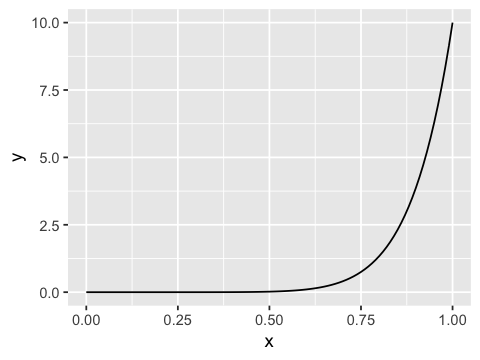

In [7]:
x = seq(0,1,0.01)
y = 10*x**(9)
qplot(x, y, geom='line')

$$
F(l) = \alpha \quad \Rightarrow \quad l = F^{-1}(\alpha) = \sqrt[n]{\alpha}
$$

$$
\mathbb{P} \left( \sqrt[n]{\alpha} \le \frac{X_{max}}{\theta} \le 1 \right) = 1 - \alpha
$$

$$
\frac{X_{max}}{\sqrt[n]{\alpha}} \le \theta \le X_{max}
$$

У нас есть доверительный интервал для $\theta$. А что, если я хочу получить доверительный интервал для математического ожидания? 

$$
\frac{X_{max}}{2 \cdot \sqrt[n]{\alpha}} \le \frac{\theta}{2} \le \frac{X_{max}}{2}
$$

## Упражнение 5 (недвижимая недвижимость) 

Посмотрим на данные по стоимости квартир в Москве и построим для них парочку интервалов. А ещё красивую картинку. Ради неё пункт и затевается. В [табличке](https://yadi.sk/i/hDxMJ0fw3VSDmu) лежит информация о стоимости квартир в Москве и о основных параметрах этих квартир.

__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```


Подгружаем данные и пакеты для работы.

In [9]:
library('dplyr')
library('ggplot2')
library('rio')

df = import('flat.csv')
head(df)

n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
1,81,58,40,6,12.5,7,1,1,1,3
2,75,44,28,6,13.5,7,1,0,1,6
3,128,70,42,6,14.5,3,1,1,1,3
4,95,61,37,6,13.5,7,1,0,1,1
5,330,104,60,11,10.5,7,0,1,1,3
6,137,76,50,9,11.0,7,1,1,1,8


In [10]:
sin(cos(5))

[1] 0.2798734

In [12]:
5 %>% cos %>% sin

[1] 0.2798734

In [13]:
df %>% summarize(x_bar = mean(price), 
                 s = sd(price))

x_bar,s
127.4966,51.87822


In [24]:
df %>% group_by(code) %>% 
       summarize(x_bar = mean(price), s = sd(price))

code,x_bar,s
1,134.4118,49.61951
2,110.3163,29.51845
3,148.2464,70.57356
4,148.6938,73.65683
5,115.7798,31.50748
6,109.9650,32.97659
7,114.2301,33.89749
8,136.7444,48.63926


In [30]:
x <- c(4,5,6,7,8, -1, -2, 7)
ifelse(x > 5, 1, 0)

[1] 0 0 1 1 1 0 0 1

__а)__ Построить $99\%$ асимптотический доверительный интервал для средней стоимости квартиры. Построить точный доверительный интервал для средней стоимости квартиры. Какой из них оказался короче? Почему? 

Асимптотический доверительный интервал: 

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

Точный доверительный интервал: 

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

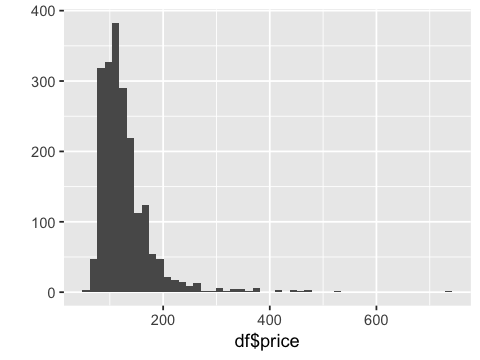

In [22]:
qplot(df$price, bins=50)

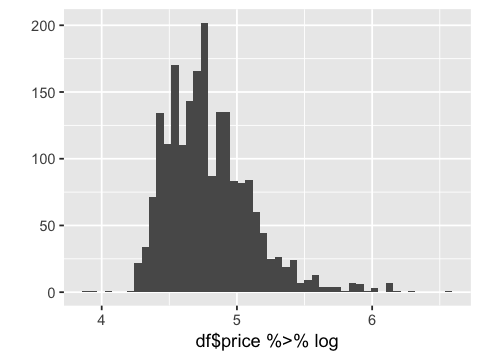

In [23]:
qplot(df$price %>% log, bins=50)

In [15]:
alpha = 0.01
z_alpha = qnorm(1 - alpha/2)

df %>% summarize(
            left = mean(price) - z_alpha * (sd(price))/sqrt(length(price)),
            right = mean(price) + z_alpha * (sd(price))/sqrt(length(price))
                )

left,right
124.538,130.4552


In [18]:
nrow(df)-1

[1] 2039

In [17]:
alpha = 0.01
t_alpha = qt(df=nrow(df)-1, 1 - alpha/2)

df %>% summarize(
            left = mean(price) - t_alpha * (sd(price))/sqrt(length(price)),
            right = mean(price) + t_alpha * (sd(price))/sqrt(length(price))
                )

left,right
124.5352,130.4579


In [ ]:
# Мы с вами до этого узнали, что t(n) => N(0,1) при n -> Infinity

__б)__ Построить $99\%$ асимптотические доверительные интервалы для всех районов. В какие из них попало общее среднее? Постройте красивую визулизацию.

In [27]:
alpha = 0.01
z_alpha = qnorm(1 - alpha/2)

df_conf = df %>% group_by(code) %>% 
        summarize(
            left = mean(price) - z_alpha * (sd(price))/sqrt(length(price)),
            right = mean(price) + z_alpha * (sd(price))/sqrt(length(price))
            )

df_conf

code,left,right
1,126.6621,142.1615
2,105.1308,115.5018
3,138.4594,158.0334
4,135.5701,161.8175
5,111.3522,120.2073
6,104.6664,115.2635
7,108.4220,120.0381
8,127.4061,146.0827


In [32]:
mu_hat = mean(df$price)
print(mu_hat)

df_conf = df_conf %>% mutate(capture_mu = ifelse(left <= mu_hat & right >= mu_hat, "yes", "no"))
df_conf

[1] 127.4966


code,left,right,capture_mu
1,126.6621,142.1615,yes
2,105.1308,115.5018,no
3,138.4594,158.0334,no
4,135.5701,161.8175,no
5,111.3522,120.2073,no
6,104.6664,115.2635,no
7,108.4220,120.0381,no
8,127.4061,146.0827,yes


In [34]:
ci_data = data.frame(ci_id = df_conf$code,            # откладываю его по оси y 
                     capture_mu = df_conf$capture_mu, # раскарска в красный или синий
                     ci_bounds = c(df_conf$left, df_conf$right) # отрисовываю по оси x интервалы
                    )

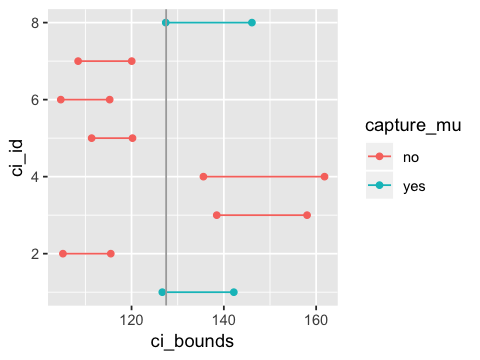

In [47]:
ggplot(data = ci_data, aes(x = ci_bounds, y = ci_id, group = ci_id, color = capture_mu)) + 
        # group - для каждого ci_id свой график 
        # color - как именно раскрашивать картинки

    geom_point(size=1.5) +  # рисует точки (начало и конец интервала)
    geom_line() +           # точки соединяет 
    geom_vline(xintercept = mu_hat, color="darkgray") # прорисовка вертикальной линии с общим средним

__в)__  Постройте по всем районам асимптотический $95\%$ доверительные интервалы для разницы в средней стоимости квартир в монолитных и панельных домах. В каких районах ноль не попадает в доверительный интервал? Что это означает? Постройте красивую картинку по аналогии с лекционной. Раскрасьте все интервалы, где ноль не попал в них в синий цвет, где попал в красный. 

In [70]:
alpha = 0.05

df_conf = df %>% group_by(code, brick) %>% 
        summarize(
            mu = mean(price), s2 = var(price), n = n()
            )

df_0 = df_conf %>% filter(brick==0)
df_1 = df_conf %>% filter(brick==1)

df_conf = left_join(df_0, df_1, by="code")

df_stat = df_conf %>% mutate(z = qnorm(1 - alpha/2)) %>% 
            mutate(left = (mu.y - mu.x) - z * sqrt(s2.x/n.x + s2.y/n.y),
                   right = (mu.y - mu.x) + z * sqrt(s2.x/n.x + s2.y/n.y)) %>% 
            mutate(is_zero = ifelse(left <= 0 & right >= 0, "yes", "no"))
df_stat

code,brick.x,mu.x,s2.x,n.x,brick.y,mu.y,s2.y,n.y,z,left,right,is_zero
1,0,123.0000,1534.8156,180,1,156.7391,3551.558,92,1.959964,20.2836329,47.19463,no
2,0,105.9516,429.3760,186,1,138.3103,2884.365,29,1.959964,12.5864622,52.13100,no
3,0,134.7337,4117.9227,169,1,161.2216,5491.636,176,1.959964,11.8774016,41.09832,no
4,0,135.9429,3604.6586,140,1,174.5652,8212.867,69,1.959964,15.0396179,62.20510,no
5,0,115.0276,745.2311,290,1,120.5217,2577.588,46,1.959964,-9.5100457,20.49835,yes
6,0,107.2850,969.7257,193,1,118.0469,1375.156,64,1.959964,0.6702168,20.85359,no
7,0,108.4868,526.9137,152,1,126.0270,2241.890,74,1.959964,6.1517410,28.92863,no
8,0,126.2535,1548.0205,71,1,143.5780,2798.228,109,1.959964,3.8199077,30.82901,no


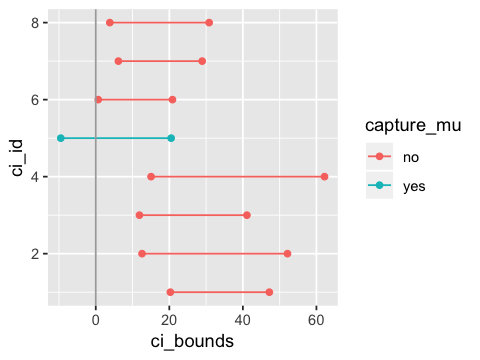

In [71]:
ci_data = data.frame(ci_id = df_stat$code,            # откладываю его по оси y 
                     capture_mu = df_stat$is_zero,    # раскарска в красный или синий
                     ci_bounds = c(df_stat$left, df_stat$right) # отрисовываю по оси x интервалы
                    )

ggplot(data = ci_data, aes(x = ci_bounds, y = ci_id, group = ci_id, color = capture_mu)) + 
        # group - для каждого ci_id свой график 
        # color - как именно раскрашивать картинки

    geom_point(size=1.5) +  # рисует точки (начало и конец интервала)
    geom_line() +           # точки соединяет 
    geom_vline(xintercept = 0, color="darkgray") # прорисовка вертикальной линии с общим средним

__г)__ Предполагая нормальность распределения цен, постройте $95\%$ доверительный интервал для дисперсии стоимости квартир. Какой теоремой мы пользуемся, чтобы вывести распределение для дисперсии? Математическое ожидание, конечно же неизвестно. 

In [74]:
alpha = 0.05
n = nrow(df)
s2 = var(df$price)

n*s2/qchisq(c(1 - alpha/2, alpha/2), df = n-1)

[1] 2534.736 2865.913

__д)__ Постройте доверительные интервалы для дисперсии по всем районам. В каких районах разброс в ценах самый высокий? Как думаете, почему именно в них? Как высокая дисперсия цен в районе влияет на вас, как на покупателя? 

[1] 2166.045

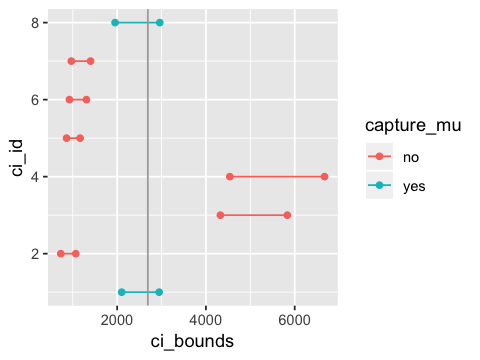

In [91]:
alpha = 0.05

df_conf = df %>% group_by(code) %>% 
        summarize(
            left = n()*var(price)/qchisq(1 -alpha/2, df = n()-1),
            right = n()*var(price)/qchisq(alpha/2, df = n()-1)
            ) %>% 
            mutate(is_zero = ifelse(left <= s2 & right >= s2, "yes", "no"))

ci_data = data.frame(ci_id = df_conf$code,            # откладываю его по оси y 
                     capture_mu = df_conf$is_zero,    # раскарска в красный или синий
                     ci_bounds = c(df_conf$left, df_conf$right) # отрисовываю по оси x интервалы
                    )

ggplot(data = ci_data, aes(x = ci_bounds, y = ci_id, group = ci_id, color = capture_mu)) + 
        # group - для каждого ci_id свой график 
        # color - как именно раскрашивать картинки

    geom_point(size=1.5) +  # рисует точки (начало и конец интервала)
    geom_line() +           # точки соединяет 
    geom_vline(xintercept = s2, color="darkgray") # прорисовка вертикальной линии с общим средним

__е)__ Тут надо немного подумать. Предполагая нормальность распределения, постройте $95\%$-ый доверительный интервал для отношения дисперсии стоимости квартир в монолитных домах и в панельных домах. 

__Hint:__ надо понять, какое распределение имеет отношение дисперсий, а после по-честному, отталкиваясь от этого распределния, вывести формулу для доверительного интервала. Роналд Эймлер ##### вам в помощь. 

* Распределение Фишера 

$$
F(n,m) = \frac{\frac{\chi^2_n}{n}}{\frac{\chi^2_m}{m}}
$$

* Теорема Фишера, которая говорит нам, что 

$$
\frac{(n-1) \cdot s^2}{\sigma^2} \sim \chi^2_{n-1}
$$

$$
F(n,m) = \frac{\frac{\frac{(n-1) \cdot s_n^2}{\sigma_n^2}}{(n-1)}}{\frac{\frac{(m-1) \cdot s_m^2}{\sigma_m^2}}{(m-1)}} = \frac{\frac{s^2_n}{\sigma^2_n}}{\frac{s^2_m}{\sigma^2_m}} = \frac{s^2_n \cdot \sigma^2_m}{s^2_m \cdot \sigma^2_n}
$$

$$
\mathbb{P}\left( F_{\frac{\alpha}{2}}(n,m) \le \frac{s^2_n \cdot \sigma^2_m}{s^2_m \cdot \sigma^2_n} \le  F_{1 - \frac{\alpha}{2}}(n,m) \right) = 1 - \alpha
$$

$$
\frac{s^2_m}{s^2_n} \cdot F_{\frac{\alpha}{2}}(n,m) \le \frac{\sigma^2_m}{\sigma^2_n} \le  \frac{s^2_m}{s^2_n} \cdot F_{1 - \frac{\alpha}{2}}(n,m)
$$

In [95]:
df0 = df %>% filter(brick==0)
df1 = df %>% filter(brick==1)

var(df0$price)/var(df1$price) * qf(c(alpha/2, 1 - alpha/2), df1=nrow(df1), df2=nrow(df0))

[1] 0.3421868 0.4449683

Вставил сюда код по районам после пары для полноты картины :) 

In [97]:
df_stat 

code,brick.x,mu.x,s2.x,n.x,brick.y,mu.y,s2.y,n.y,z,left,right,is_zero
1,0,123.0000,1534.8156,180,1,156.7391,3551.558,92,1.959964,20.2836329,47.19463,no
2,0,105.9516,429.3760,186,1,138.3103,2884.365,29,1.959964,12.5864622,52.13100,no
3,0,134.7337,4117.9227,169,1,161.2216,5491.636,176,1.959964,11.8774016,41.09832,no
4,0,135.9429,3604.6586,140,1,174.5652,8212.867,69,1.959964,15.0396179,62.20510,no
5,0,115.0276,745.2311,290,1,120.5217,2577.588,46,1.959964,-9.5100457,20.49835,yes
6,0,107.2850,969.7257,193,1,118.0469,1375.156,64,1.959964,0.6702168,20.85359,no
7,0,108.4868,526.9137,152,1,126.0270,2241.890,74,1.959964,6.1517410,28.92863,no
8,0,126.2535,1548.0205,71,1,143.5780,2798.228,109,1.959964,3.8199077,30.82901,no


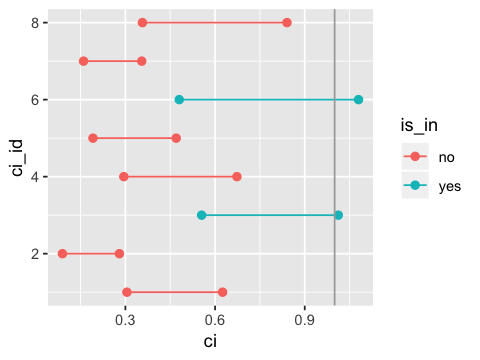

In [98]:
# Речь идёт про отношение дисперсий, а мы знаем что оно распределено по Фишеру!
alpha = 0.05

# Все расчёты в этой строчке!
df_stat = df_stat %>% mutate(left_s = s2.x/s2.y*qf(alpha/2, n.x-1, n.y-1),
                   right_s = s2.x/s2.y*qf(1 - alpha/2, n.x-1, n.y-1))

# Дальше пошло строительство картинки 
# Отношение дисперсий надо сравнивать с 1 
df_stat = df_stat %>% mutate(is_sin = ifelse(left_s < 1 & right_s > 1, "yes", "no"))  

# 
ci_data = data.frame(ci_id = df_stat$code,        # по оси y будем откладывать id района
                     is_in = df_stat$is_sin,       # раскраска для интервалов
                     ci = c(df_stat$left_s, df_stat$right_s))  # интервалы для оси x 

ggplot(data = ci_data, aes(x = ci, y = ci_id, group = ci_id, color = is_in)) + 
    geom_point(size = 2) +
    geom_line() +
    geom_vline(xintercept = 1, color = "darkgray")

__ж)__ Сделайте интересные выводы! 

In [ ]:
## :)